In [ ]:
!pip install pycaret

In [143]:
from pycaret.utils import enable_colab
enable_colab()
import pycaret
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import plotly.express as px
from pycaret.utils import check_metric
import pickle

Colab mode enabled.


In [ ]:
df = pd.read_csv('drive/MyDrive/Trabalho/CESAR/Bias_correction_ucl_treated.csv', sep=',')
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [121]:
data = df.sample(frac=0.9, random_state=786)
data_validation = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_validation.reset_index(drop=True, inplace=True)


In [149]:
setup_baseline = setup(data = data, train_size=.7, target = 'Next_Tmax', session_id=222,
                  log_experiment = True, experiment_name = 'CESAR Challenge', ignore_features = ['Date'])

,Description,Value
0,session_id,222
1,Target,Next_Tmax
2,Original Data,"(6975, 21)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4882, 19)"


In [110]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6857,0.8329,0.9114,0.9137,0.0298,0.0230,2.420
lightgbm,Light Gradient Boosting Machine,0.7240,0.9088,0.9525,0.9057,0.0312,0.0244,0.216
rf,Random Forest Regressor,0.7587,1.0281,1.0131,0.8934,0.0332,0.0255,4.230
gbr,Gradient Boosting Regressor,0.9435,1.5286,1.2355,0.8415,0.0405,0.0318,2.017
br,Bayesian Ridge,1.0850,2.0672,1.4369,0.7857,0.0471,0.0366,0.019
ridge,Ridge Regression,1.0853,2.0670,1.4368,0.7857,0.0471,0.0366,0.017
lr,Linear Regression,1.0854,2.0672,1.4369,0.7857,0.0471,0.0366,0.016
lar,Least Angle Regression,1.0854,2.0672,1.4369,0.7857,0.0471,0.0366,0.020
dt,Decision Tree Regressor,1.1080,2.3620,1.5348,0.7547,0.0503,0.0371,0.083
en,Elastic Net,1.2039,2.4680,1.5701,0.7443,0.0517,0.0409,0.019


In [111]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6416,0.7080,0.8414,0.9256,0.0273,0.0214
1,0.6694,0.7831,0.8849,0.9173,0.0291,0.0225
2,0.7309,0.9497,0.9746,0.9019,0.0318,0.0243
3,0.6600,0.7369,0.8585,0.9276,0.0282,0.0222
4,0.7203,0.9353,0.9671,0.9070,0.0317,0.0242
5,0.7196,0.8948,0.9459,0.9048,0.0303,0.0238
6,0.6598,0.7607,0.8722,0.9178,0.0289,0.0224
7,0.6856,0.8720,0.9338,0.9046,0.0308,0.0231
8,0.7160,0.9180,0.9581,0.9103,0.0317,0.0242
9,0.6534,0.7703,0.8777,0.9203,0.0285,0.0218


In [94]:
tuned_et = tune_model(et, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8921,1.3618,1.1670,0.8569,0.0381,0.0299
1,0.9630,1.6201,1.2729,0.8288,0.0419,0.0326
2,0.9731,1.6797,1.2960,0.8265,0.0427,0.0327
3,0.9317,1.4315,1.1964,0.8593,0.0393,0.0315
4,0.9776,1.7051,1.3058,0.8305,0.0429,0.0330
5,0.9632,1.5162,1.2313,0.8386,0.0395,0.0320
6,0.9248,1.5043,1.2265,0.8375,0.0406,0.0315
7,0.9350,1.5834,1.2583,0.8267,0.0414,0.0316
8,0.9746,1.6437,1.2821,0.8394,0.0423,0.0330
9,0.8825,1.3359,1.1558,0.8619,0.0375,0.0296


In [95]:
tuned_lightgbm = tune_model(lightgbm, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7456,0.9133,0.9557,0.9041,0.0314,0.0251
1,0.7287,0.8785,0.9373,0.9072,0.0308,0.0246
2,0.8062,1.1438,1.0695,0.8818,0.0350,0.0270
3,0.7799,0.9714,0.9856,0.9045,0.0324,0.0262
4,0.7682,0.9664,0.9830,0.9040,0.0325,0.0260
5,0.7355,0.9453,0.9723,0.8994,0.0314,0.0245
6,0.7662,0.9572,0.9784,0.8966,0.0323,0.0259
7,0.7637,0.9970,0.9985,0.8909,0.0330,0.0258
8,0.7913,1.0502,1.0248,0.8974,0.0337,0.0266
9,0.7478,0.9311,0.9649,0.9037,0.0317,0.0251


In [96]:
tuned_rf = tune_model(rf, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8688,1.2989,1.1397,0.8635,0.0374,0.0293
1,0.8940,1.4142,1.1892,0.8506,0.0392,0.0302
2,0.9412,1.5375,1.2400,0.8412,0.0406,0.0315
3,0.8875,1.3106,1.1448,0.8712,0.0377,0.0301
4,0.9405,1.5627,1.2501,0.8447,0.0412,0.0318
5,0.9231,1.4449,1.2021,0.8462,0.0385,0.0306
6,0.8937,1.3900,1.1790,0.8499,0.0391,0.0304
7,0.8954,1.4997,1.2246,0.8359,0.0403,0.0302
8,0.9512,1.5698,1.2529,0.8466,0.0415,0.0322
9,0.8692,1.3186,1.1483,0.8636,0.0375,0.0292


Observando os resultados, utilizando o modelo sem nenhum tuning de hiperparâmetros com gridsearch e sem feature selectiontemos o melhor resultado. Logo para uma primeira abordagem seria a melhor escolha.

#### Aplicação do modelo em teste e validação

In [117]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6878,0.8271,0.9095,0.9154,0.0295,0.0229


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Next_Tmax,Label
0,25.0,32.799999,25.700001,21.469881,89.621712,35.874596,25.228569,7.838337,39.037716,0.558199,0.091463,0.036828,0.047137,37.523701,126.970001,19.584400,0.2713,5785.897949,25.100000,34.500000,34.5170
1,11.0,26.299999,22.600000,74.309662,90.953728,23.908329,21.389530,8.472641,53.989002,0.662699,0.818572,0.878121,0.907723,37.537201,127.084999,28.700001,0.6233,5039.804199,20.700001,24.600000,24.5840
2,15.0,27.400000,25.299999,58.676979,96.223160,28.897223,22.856115,10.135071,54.422527,0.917331,0.355073,0.083794,0.335617,37.550701,126.936996,30.046400,0.8552,5711.833496,23.000000,25.299999,27.2880
3,4.0,26.000000,23.200001,71.778290,98.368286,28.745867,21.859333,7.321008,94.630707,0.288926,0.193662,0.131311,0.043441,37.645000,127.022003,45.716000,2.5348,5776.879395,22.200001,32.299999,30.6210
4,14.0,28.600000,21.799999,46.805496,85.952003,30.382915,23.432524,5.040125,11.644788,0.150779,0.130039,0.304453,0.216171,37.496700,126.927002,30.968000,0.6180,4991.326660,21.400000,30.900000,30.7340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,10.0,26.100000,24.600000,69.514122,97.838524,26.267637,22.009117,13.809002,66.626419,0.673023,0.507428,0.142311,0.212804,37.456200,126.955002,208.507004,5.1782,5591.034180,22.100000,26.799999,27.3360
2089,25.0,35.000000,28.000000,49.311687,81.668793,33.963039,28.805170,6.554588,32.722225,0.381398,0.179670,0.249878,0.093421,37.523701,126.970001,19.584400,0.2713,5234.533203,28.400000,35.599998,35.1370
2090,17.0,27.100000,21.299999,87.947060,96.198288,23.691179,21.808538,6.688220,35.177540,0.712114,0.873251,0.680467,0.607843,37.618099,127.098999,53.471199,0.6970,4836.728027,19.400000,24.400000,23.9260
2091,14.0,27.299999,24.100000,45.867188,83.702103,33.676929,24.469906,5.298347,17.585875,0.484966,0.311773,0.041914,0.031462,37.496700,126.927002,30.968000,0.6180,5413.715820,23.600000,33.700001,33.2130


In [150]:
final_et_baseline = finalize_model(et)

In [120]:
print(final_et_baseline)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=222, verbose=0, warm_start=False)


Aplicando modelo em conjunto de validação

In [123]:
validation_predictions = predict_model(final_et_baseline, data=data_validation)
validation_predictions.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Label
0,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,31.537
1,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9,31.088
2,12.0,2013-06-30,31.6,22.2,51.288349,80.338013,28.936314,24.365949,6.423993,28.719288,0.251017,0.256294,0.182102,0.131400,37.5507,126.988,132.1180,0.5931,5924.328613,32.6,22.2,31.214
3,14.0,2013-06-30,31.3,23.8,50.745735,74.498810,29.498526,24.459427,6.319478,16.835611,0.357665,0.323949,0.241908,0.150746,37.4967,126.927,30.9680,0.6180,5857.949707,31.7,22.9,31.361
4,19.0,2013-06-30,31.4,22.8,52.265926,75.483757,29.273668,24.970151,6.359286,36.339969,0.276465,0.295129,0.188506,0.140354,37.5776,126.938,75.0924,1.7678,5893.578125,31.8,21.6,30.742


In [130]:
print("Scores obtained from the baseline model executed in validation data")
print("R2 score.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'R2'))
print("MAE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MAE'))
print("MSE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MSE'))
print("RMSE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'RMSE'))
print("MAPE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MAPE'))

Scores obtained from the model executed in validation data
R2 score.: 0.9266
MAE.: 0.6585
MSE.: 0.7493
RMSE.: 0.8656
MAPE.: 0.0221


In [151]:
#salvando modelo de baseline
save_model(final_et_baseline,'drive/MyDrive/Trabalho/CESAR/nxt_day_temp_prediction_et_22_12_2021_baseline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Date'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Next_Tmax',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

### Teste com Seleção de features e remoção de multicolinearidae

In [152]:
setup_feature_sel = setup(data = data, train_size=.7, target = 'Next_Tmax',
                  normalize = True, session_id=222, remove_multicollinearity = True, multicollinearity_threshold = 0.85,  feature_selection = True,
                  log_experiment = True, experiment_name = 'CESAR Challenge', ignore_features = ['Date'])

,Description,Value
0,session_id,222
1,Target,Next_Tmax
2,Original Data,"(6975, 21)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4882, 16)"


In [98]:
best2 = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6800,0.8251,0.9072,0.9145,0.0297,0.0228,2.664
lightgbm,Light Gradient Boosting Machine,0.7166,0.8877,0.9414,0.9079,0.0309,0.0241,0.389
rf,Random Forest Regressor,0.7526,1.0157,1.0068,0.8947,0.0330,0.0253,4.842
knn,K Neighbors Regressor,0.8257,1.2018,1.0954,0.8755,0.0358,0.0277,0.134
gbr,Gradient Boosting Regressor,0.9450,1.5280,1.2352,0.8416,0.0404,0.0318,2.128
huber,Huber Regressor,1.0944,2.1252,1.4566,0.7797,0.0477,0.0369,0.092
dt,Decision Tree Regressor,1.0955,2.2992,1.5140,0.7615,0.0495,0.0367,0.121
lar,Least Angle Regression,1.0973,2.1169,1.4539,0.7806,0.0477,0.0370,0.031
br,Bayesian Ridge,1.0973,2.1168,1.4538,0.7806,0.0477,0.0370,0.033
ridge,Ridge Regression,1.0973,2.1169,1.4538,0.7806,0.0477,0.0370,0.033


In [104]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6278,0.6926,0.8322,0.9272,0.0270,0.0210
1,0.6712,0.7985,0.8936,0.9156,0.0293,0.0225
2,0.7293,0.9529,0.9762,0.9016,0.0318,0.0243
3,0.6537,0.7374,0.8587,0.9275,0.0282,0.0220
4,0.7204,0.9175,0.9579,0.9088,0.0315,0.0242
5,0.7028,0.8722,0.9339,0.9072,0.0299,0.0233
6,0.6525,0.7448,0.8630,0.9196,0.0287,0.0221
7,0.6855,0.8593,0.9270,0.9060,0.0305,0.0230
8,0.7065,0.8978,0.9475,0.9123,0.0312,0.0238
9,0.6506,0.7775,0.8818,0.9196,0.0285,0.0217


In [ ]:
et2

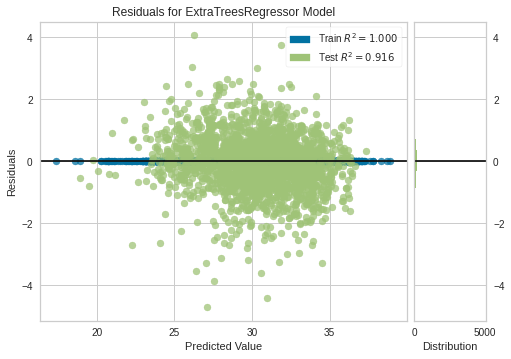

In [106]:
plot_model(et2)

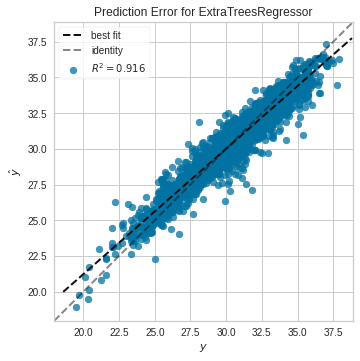

In [153]:
plot_model(et2, plot = 'error')

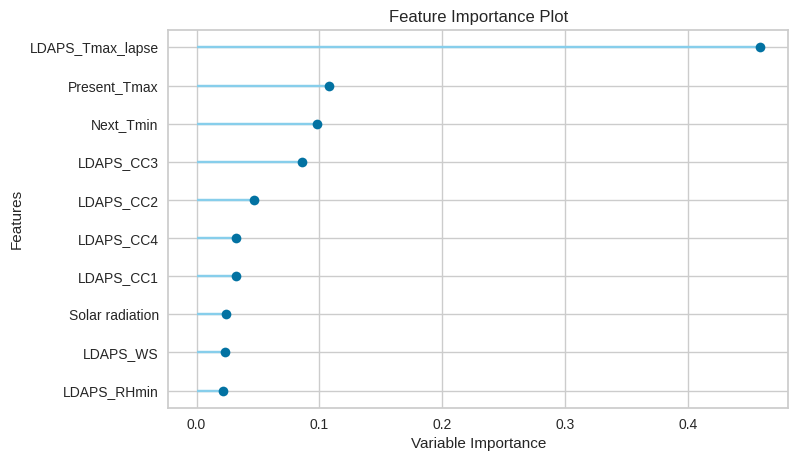

In [108]:
plot_model(et2, plot='feature')

#### Testando tunning do modelo com feature selection e multicolinearity removal

In [112]:
tuning_et2 = tune_model(et2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8921,1.3618,1.1670,0.8569,0.0381,0.0299
1,0.9630,1.6201,1.2729,0.8288,0.0419,0.0326
2,0.9731,1.6797,1.2960,0.8265,0.0427,0.0327
3,0.9317,1.4315,1.1964,0.8593,0.0393,0.0315
4,0.9776,1.7051,1.3058,0.8305,0.0429,0.0330
5,0.9632,1.5162,1.2313,0.8386,0.0395,0.0320
6,0.9248,1.5043,1.2265,0.8375,0.0406,0.0315
7,0.9350,1.5834,1.2583,0.8267,0.0414,0.0316
8,0.9746,1.6437,1.2821,0.8394,0.0423,0.0330
9,0.8825,1.3359,1.1558,0.8619,0.0375,0.0296


Observando os resultados do tuning aparentemente o modelo "cru" apresenta uma melhor performance contendo um MAE mais baixo e um score R2 mais alto o que indica uma melhor generalização do modelo. Logo, resolvi ficar com o modelo de Extra Tree Regressor com feature selection e remoção de colinearidades sem tuning

### Avaliação do modelo no conjunto de teste e validação

Aplicando o modelo no conjunto de teste 

In [115]:
predict_model(et2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6827,0.8165,0.9036,0.9165,0.0294,0.0228


,Present_Tmax,LDAPS_CC1,LDAPS_CC2,Present_Tmin,LDAPS_RHmin,LDAPS_WS,Next_Tmin,DEM,Solar radiation,LDAPS_LH,LDAPS_CC3,Slope,LDAPS_Tmax_lapse,LDAPS_RHmax,lon,LDAPS_CC4,Next_Tmax,Label
0,1.016398,0.750645,-1.024178,1.028798,-2.426972,0.325237,0.872054,-0.779161,1.034153,-0.706000,-1.136933,-0.720237,2.150098,0.165784,-0.267477,-1.000000,34.500000,34.3600
1,-1.196105,1.154375,1.801910,-0.266646,1.197077,0.615950,-0.903530,-0.612160,-0.706389,-0.264508,2.248840,-0.463184,-1.961442,0.351286,1.178964,2.400494,24.600000,24.6130
2,-0.821681,2.138130,0.000408,0.861644,0.124900,1.377870,0.024616,-0.587493,0.861370,-0.251707,-0.947920,-0.293835,-0.247287,1.085130,-0.682611,0.139889,25.299999,27.0320
3,-1.298220,-0.289678,-0.626957,-0.015914,1.023461,0.088136,-0.298217,-0.300420,1.013114,0.935588,-0.756691,0.932720,-0.299292,1.383870,0.386602,-1.014604,32.299999,30.7820
4,-0.413219,-0.823402,-0.874243,-0.600954,-0.689313,-0.957232,-0.621051,-0.570609,-0.819481,-1.514877,-0.059881,-0.467054,0.263189,-0.345275,-0.808321,-0.332086,30.900000,30.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,-1.264181,1.194259,0.592572,0.569125,0.868172,3.061697,-0.338572,2.681974,0.579561,0.108658,-0.712422,2.863106,-1.150797,1.310093,-0.456139,-0.345390,26.799999,27.4400
2089,1.765245,0.067582,-0.681340,1.989934,-0.517425,-0.263127,2.203741,-0.779161,-0.252111,-0.892488,-0.279516,-0.720237,1.493299,-0.941774,-0.267477,-0.817118,35.599998,35.0930
2090,-0.923796,1.345285,2.014433,-0.809897,2.132406,-0.201882,-1.428135,-0.158342,-1.180140,-0.819986,1.453385,-0.409363,-2.036054,1.081667,1.355055,1.215556,24.400000,23.6115
2091,-0.855720,0.467714,-0.167891,0.360182,-0.753668,-0.838885,0.266741,-0.570609,0.165900,-1.339445,-1.116468,-0.467054,1.394993,-0.658606,-0.808321,-1.061937,33.700001,33.2600


Justificar melhora com feature_selection

Finalizando modelo e aplicando no conjunto de validação 

In [135]:
final_et_feat_sel = finalize_model(et2)

In [137]:
print(final_et_feat_sel)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=222, verbose=0, warm_start=False)


In [138]:
validation_predictions_feat_sel = predict_model(final_et_feat_sel, data=data_validation)
validation_predictions_feat_sel.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Label
0,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,31.574
1,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9,31.322
2,12.0,2013-06-30,31.6,22.2,51.288349,80.338013,28.936314,24.365949,6.423993,28.719288,0.251017,0.256294,0.182102,0.131400,37.5507,126.988,132.1180,0.5931,5924.328613,32.6,22.2,31.262
3,14.0,2013-06-30,31.3,23.8,50.745735,74.498810,29.498526,24.459427,6.319478,16.835611,0.357665,0.323949,0.241908,0.150746,37.4967,126.927,30.9680,0.6180,5857.949707,31.7,22.9,31.131
4,19.0,2013-06-30,31.4,22.8,52.265926,75.483757,29.273668,24.970151,6.359286,36.339969,0.276465,0.295129,0.188506,0.140354,37.5776,126.938,75.0924,1.7678,5893.578125,31.8,21.6,30.627


In [140]:
print("Scores obtained from the model with feature selection executed in validation data")
print("R2 score.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'R2'))
print("MAE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MAE'))
print("MSE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MSE'))
print("RMSE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'RMSE'))
print("MAPE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MAPE'))

Scores obtained from the model with feature selection executed in validation data
R2 score.: 0.9271
MAE.: 0.6559
MSE.: 0.7445
RMSE.: 0.8628
MAPE.: 0.0221


Apesar da diferença ser pequena ao analisarmos as métricas, é válido observar que o modelo com feature selection apresenta uma melhora ao utilizar menos features, diminuindo o espaço de variáveis o que em uma visão de engenharia representa um esforço menor para manutenção de variáveis e no próprio modelo.

In [142]:
#salvando modelo com feature_selection
save_model(final_et_feat_sel,'drive/MyDrive/Trabalho/CESAR/nxt_day_temp_prediction_et_22_12_2021_feat_sel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Date'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Next_Tmax',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

In [148]:
modelo = {
    'features': validation_predictions_feat_sel.drop(['Label','Date'],axis=1).columns,
    'pipeline': final_et_feat_sel
}


pickle.dump(modelo, open('drive/MyDrive/Trabalho/CESAR/prediction_model_feat_sel_22_12_2021.pkl', 'wb'))